
# Project (5): Wrangle and Analyze Data
# Bashair Altalhi



## Table of Contents
<ul>
<li><a href="#gather">Gather</a></li>
<li><a href="#Assessing">Assessing</a></li>
<li><a href="#eda">Clean</a></li>
<li><a href="#analyzing">Analyzing</a></li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt


<a id='gather'></a>
## Gather

### Enhanced Twitter Archive data

In [3]:
#load twitter-archive-enhanced file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#disply the data
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Predictions File

In [5]:
#load data programmatically 
#get
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
    

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
#load data
df_image = pd.read_csv('image_predictions.tsv',sep='\t')

In [7]:
#disply the data
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Additional Data via the Twitter API

In [7]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'xxxxxxx'
consumer_secret = 'xxxxx'
access_token = 'xxxxx'
access_secret = 'xxxxx'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


I download the data from Project page. 

In [8]:
#load the data
df_tweet = pd.read_json('tweet-json copy', lines= True)

        
# disply the data
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
#Read this tweet_json.txt file into a pandas DataFram
df_tweets = pd.DataFrame(df_tweet)

In [10]:
# Element the columns to " tweet ID, retweet count, and favorite count."
df_tweets = df_tweets.loc[:,['id','favorite_count','retweet_count']]

In [11]:
#display the data
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


<a id='Assessing'></a>
## Assessing

### Visual Assessment

In this section, I will have 3 data and will do the visual assessment for each:

##### Enhanced Twitter Archive data

In [12]:
# display the data
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### Image Predictions data

In [13]:
#display the data
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### Tweet-json

In [14]:
#display
df_tweets

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


 ### Programmatic Assessments in pandas

##### Enhanced Twitter Archive data

In [15]:
#display the tail of the data
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
#display a sample of the data
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1549,689255633275777024,NaN,NaN,2016-01-19 01:18:43 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ferg. He swallowed a chainsaw. 1 like ...,NaN,NaN,NaN,https://vine.co/v/iOL792n5hz2,10,10,Ferg,None,None,None,None
1133,728751179681943552,NaN,NaN,2016-05-07 00:59:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flurpson. He can't believe it's not bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728751179...,10,10,Flurpson,None,None,None,None
459,817827839487737858,NaN,NaN,2017-01-07 20:18:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He ran into a glass door once. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,None,None,None,None
731,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,None,None,None
539,806576416489959424,NaN,NaN,2016-12-07 19:09:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman catch successful. Massive hit by dog. F...,NaN,NaN,NaN,https://twitter.com/deadspin/status/8065709331...,13,10,None,None,None,None,None
1330,705786532653883392,7.032559e+17,4.196984e+09,2016-03-04 16:06:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705786532...,11,10,None,None,None,pupper,None
974,750056684286914561,NaN,NaN,2016-07-04 20:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Jameson. He had a few too many in the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750056684...,11,10,Jameson,None,None,None,None
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667937095...,3,10,None,None,None,None,None
755,778748913645780993,NaN,NaN,2016-09-22 00:13:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Mya (pronounced ""mmmyah?""). Her head i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/778748913...,11,10,Mya,None,None,None,None
750,779123168116150273,NaN,NaN,2016-09-23 01:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779123168...,12,10,Reggie,None,None,None,None


In [17]:
df_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [18]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
df_archive[df_archive['in_reply_to_user_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [22]:
#check for duplicate in name
df_archive[df_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [23]:
df_archive[df_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
not              2
mad              2
actually         2
getting          2
this             1
unacceptable     1
light            1
his              1
my               1
space            1
infuriating      1
by               1
such             1
all              1
incredibly       1
old              1
life             1
officially       1
Name: name, dtype: int64

##### Image Predictions data

In [24]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
 df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True
1354,760252756032651264,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False
1958,865359393868664832,https://pbs.twimg.com/media/DAJfxqGVoAAnvQt.jpg,2,Chesapeake_Bay_retriever,0.832435,True,Labrador_retriever,0.163551,True,Weimaraner,0.002770,True
337,672231046314901505,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,1,killer_whale,0.823919,False,grey_whale,0.036601,False,hammerhead,0.029522,False
1231,745789745784041472,https://pbs.twimg.com/media/ClmT0KHWkAAXbhy.jpg,1,Pekinese,0.984267,True,Shih-Tzu,0.008942,True,cocker_spaniel,0.001928,True
283,671138694582165504,https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg,1,Samoyed,0.587342,True,Great_Pyrenees,0.268952,True,Pekinese,0.090527,True
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
1012,709519240576036864,https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg,1,cocker_spaniel,0.414982,True,Newfoundland,0.225482,True,flat-coated_retriever,0.196789,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True


In [26]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


##### Tweet-json

In [28]:
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [29]:
df_tweets.sample(10)

,id,favorite_count,retweet_count
573,801127390143516673,0,4627
1921,674082852460433408,804,186
266,841680585030541313,27854,8748
2292,667138269671505920,4851,2387
1411,698907974262222848,2787,699
446,819015331746349057,0,21794
2041,671536543010570240,1253,441
172,858471635011153920,22640,5271
48,882762694511734784,28903,5134
638,793256262322548741,22350,9714


In [30]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [31]:
df_tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [32]:
df_tweets.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [33]:
df_tweets.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

#### Quality
##### `df _archive` table

 * Misssing value in the following:
   * 'in_reply_to_status' the total of values are 78 and it is supposed to be 2356.
   * 'in_reply_to_user_id' the total of values are 78 and  it is supposed to be 2356.
   * 'retweted_status_id' the total of values are 181 and  it is supposed to be 2356.
   * 'retweted_status_user_id' the total of values are 181 and  it is supposed to be 2356.
   * 'retweted_status_timestamp' the total of values are 181 and  it is supposed to be 2356.
   * 'expanded_urls' the total of values are 2297 and  it is supposed to be 2356.
 * 'timestamp' is object not datetime.
 * 'tweet_id' is int not object.
 * ' name' some names are invalida 'Nane', 'a', 'the', 'an', 'very', just', 'quit', 'one','not', 'mad', 'getting', 'actually', 'unacceptable','this', 'old', 'space', 'such', 'light', 'infuriating', 'incresibly', 'all', 'by', 'my', 'his', 'officially', and 'life'.
 * 'rating_numerator' and 'rating_denominator' type are int not float.
 * 'rating_numerator' has incorrect ratings 
    * Tweet ID 810984652412424192. 24/7 isn't a valid rating it should not be any rating.
    * Tweet ID 835246439529840640. 960/00 isn't a valid rating should be  13 and 10.
    * Tweet ID 883482846933004288 5/10 but it should be 13.5/10.
    * Tweet ID 832215909146226688 and 786709082849828864 75/10 it should be 9.75/10.
    * Tweet ID 778027034220126208 27/10 it should be 11.27/10.
    * Tweet ID 681340665377193984 5/10 it should be 9.5/10.
    * Tweet ID 680494726643068929 26/10 it should be 11.26/10.   
 * 'dog_stages' should be catagory.


##### `df_tweets` table 

* 'id' is int not object.
* 'retweet_count' and 'favorite_count' is floats not integers.

##### `df_image` table 

'id' is int not object.

#### Tidiness

* 'puppo', 'doggo', 'floofer', 'pupper' are dog "stage" should be in one cloumn.
*  Merge df_archive, df_image,  and df_tweets into one by tweeter Id.

<a id='eda'></a>
## Clean

In [34]:
archive_clean = df_archive.copy()
image_clean = df_image.copy()
tweet_clean = df_tweets.copy()

### Qulity 
#### Missing value

#### Define
* Removing the missing value in `df _archive` by dropping rows
  * 'expanded_urls' the total of values are 2297 and it is supposed to be 2356.

##### Code

In [35]:
# drop the row with missing value
archive_clean.dropna(subset=['expanded_urls'], axis=0, inplace =True )

##### Test

In [36]:
#disply the data info
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

It works the total values are 2297.

#### Define
* Removing the missing value in `df _archive` by dropping the column
  * 'in_reply_to_status' the total of values are 78 and it is supposed to be 2356.
  * 'in_reply_to_user_id' the total of values are 78 and it is supposed to be 2356.
  * 'retweted_status_id' the total of values are 181 and it is supposed to be 2356.
  * 'retweted_status_user_id' the total of values are 181 and it is supposed to be 2356.
  * 'retweted_status_timestamp' the total of values are 181 and it is supposed to be 2356.
  

##### Code

In [37]:
#drop columns with missing value.
archive_clean.dropna(axis='columns', inplace= True)

##### Test

In [38]:
#display the data
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [39]:
#disply the data info
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   doggo               2297 non-null   object
 9   floofer             2297 non-null   object
 10  pupper              2297 non-null   object
 11  puppo               2297 non-null   object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


### Tidness 

#### Defne

* Creating new column 'dog stage' contans 'puppo', 'doggo', 'floofer', and 'pupper' by combining the columns.
* convert 'dog stage to category.

#### Code

In [40]:
# handle none
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# handle multiple stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [41]:
#convert to category
archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')

#### Test

In [42]:
#display the data
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,,,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,,,,,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,,,,,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,,,,,NaN


In [43]:
# check the type
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2297 non-null   int64   
 1   timestamp           2297 non-null   object  
 2   source              2297 non-null   object  
 3   text                2297 non-null   object  
 4   expanded_urls       2297 non-null   object  
 5   rating_numerator    2297 non-null   int64   
 6   rating_denominator  2297 non-null   int64   
 7   name                2297 non-null   object  
 8   doggo               2297 non-null   object  
 9   floofer             2297 non-null   object  
 10  pupper              2297 non-null   object  
 11  puppo               2297 non-null   object  
 12  dog_stage           374 non-null    category
dtypes: category(1), int64(3), object(9)
memory usage: 235.9+ KB


In [44]:
#check the value of dog stages
archive_clean['dog_stage'].value_counts()

pupper            243
doggo              80
puppo              28
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

## Qulity

#### Define
* Converting 'timestamp' to datetime by using pd.to_datetime.

##### Code

In [45]:
#Convert object to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')


##### Test

In [46]:
#check the data type
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                2297 non-null   object             
 8   doggo               2297 non-null   object             
 9   floofer             2297 non-null   object             
 10  pupper              2297 non-null   object             
 11  puppo               2297 non-null   object             
 12  dog_stage           374 non-null  

##### Define

* Converting 'tweet_id' to string in `archive_clean` and `image_clean`
* Converting 'id' to string in `tweet_clean`

##### Code

In [47]:
#convert to string
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

In [48]:
#convert to string
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

In [49]:
#convert to string
tweet_clean['id'] = tweet_clean['id'].astype(str)

##### Test

In [50]:
#check the type
archive_clean['tweet_id'].describe()

count                   2297
unique                  2297
top       884925521741709313
freq                       1
Name: tweet_id, dtype: object

In [51]:
#check the type
image_clean['tweet_id'].describe()

count                   2075
unique                  2075
top       671504605491109889
freq                       1
Name: tweet_id, dtype: object

In [52]:
#check the type
tweet_clean['id'].describe()

count                   2354
unique                  2354
top       884925521741709313
freq                       1
Name: id, dtype: object

##### Define
* Replacing 'Nane', 'a', 'the', 'an', 'very', just', 'quit', 'one','not', 'mad', 'getting', 'actually', 'unacceptable','this', 'old', 'space', 'such', 'light', 'infuriating', 'incresibly', 'all', 'by', 'my', 'his', 'officially', and 'life'. in 'name column by NaN in `archive_clean`.


##### Code

In [53]:
#Replacing by NaN
archive_clean['name'].replace(to_replace=['None','a','the','an', 'very', 'just', 'quit', 'one','not', 'mad', 'getting',
                                          'actually', 'unacceptable','this', 'old', 'space', 'such', 'light', 'infuriating',
                                          'incresibly', 'all', 'by', 'my', 'his', 'officially', 'life'], value=np.nan,
                              inplace=True)

##### Test

In [54]:
#check 
archive_clean.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1693,681297372102656000,2015-12-28 02:15:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a lion. We only rate dogs. Fo...,https://twitter.com/dog_rates/status/681297372...,12,10,NaN,,,,,NaN
21,887705289381826560,2017-07-19 16:06:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He has a monopoly on the pool...,https://twitter.com/dog_rates/status/887705289...,13,10,Jeffrey,,,,,NaN
285,838916489579200512,2017-03-07 00:57:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,https://twitter.com/KibaDva/status/83890598062...,15,10,NaN,,,,,NaN
1573,687494652870668288,2016-01-14 04:41:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marq. He stole this car. 7/10 wtf Marq...,https://twitter.com/dog_rates/status/687494652...,7,10,Marq,,,,,NaN
2252,667801013445750784,2015-11-20 20:25:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",OMIGOD 12/10 https://t.co/SVMF4Frf1w,https://twitter.com/dog_rates/status/667801013...,12,10,NaN,,,,,NaN
2066,671147085991960577,2015-11-30 02:01:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,https://twitter.com/dog_rates/status/671147085...,9,10,NaN,,,,,NaN
1606,685667379192414208,2016-01-09 03:40:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marty. He has no idea what happened he...,https://twitter.com/dog_rates/status/685667379...,9,10,Marty,,,pupper,,pupper
784,775096608509886464,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,,,,,NaN
2225,668286279830867968,2015-11-22 04:33:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. Rusty's dreaming of a world where ...,https://twitter.com/dog_rates/status/668286279...,11,10,Rusty,,,,,NaN
736,780931614150983680,2016-09-28 00:46:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,https://twitter.com/dog_rates/status/780931614...,13,10,NaN,,,,puppo,puppo


#### Define
* Converting 'retweet_count' and 'favorite_count' is to integers. 

#### Code

In [55]:
#convert retweet count to integers
tweet_clean['retweet_count'] = tweet_clean['retweet_count'].astype(int)

In [56]:
#convert favorite count to integers
tweet_clean['favorite_count'] = tweet_clean['favorite_count'].astype(int)

#### Test

In [57]:
# check type
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   favorite_count  2354 non-null   int32 
 2   retweet_count   2354 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


#### Define 
* Renaming 'id' to 'tweet_id' in `tweet_clean`

#### Code

In [58]:
tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [59]:
tweet_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


#### Define

* Converting 'rating_numerator' type to float.
* Converting 'rating_denominator' type to float.
* Correcting 'rating_numerator': 
    * Tweet ID 810984652412424192. 24/7 isn't a valid rating it should not be any rating.
    * Tweet ID 835246439529840640. 960/00 isn't a valid rating should be  13 and 10.
    * Tweet ID 883482846933004288 5/10 but it should be 13.5/10.
    * Tweet ID 832215909146226688 and 786709082849828864 75/10 it should be 9.75/10.
    * Tweet ID 778027034220126208 27/10 it should be 11.27/10.
    * Tweet ID 681340665377193984 5/10 it should be 9.5/10.
    * Tweet ID 680494726643068929 26/10 it should be 11.26/10.   


#### Code

In [60]:
#convert numerator
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)

In [61]:
#convert denominator
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

In [62]:
# drop the column with ID "810984652412424192"
#find the row number
archive_clean[archive_clean['tweet_id'] == '810984652412424192'].index

Int64Index([516], dtype='int64')

In [63]:
#drop the row 516
archive_clean = archive_clean.drop(archive_clean.index[516])

In [64]:
# correcting update numerators values
archive_clean.loc[(archive_clean.tweet_id == 835246439529840640 ), 'rating_numerator'] = 13 
archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

In [65]:
#extract
#rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
#rating.columns = ['rating_numerator', 'rating_denominator']

#### Test

In [66]:
#check the data type
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2296 non-null   object             
 1   timestamp           2296 non-null   datetime64[ns, UTC]
 2   source              2296 non-null   object             
 3   text                2296 non-null   object             
 4   expanded_urls       2296 non-null   object             
 5   rating_numerator    2296 non-null   float64            
 6   rating_denominator  2296 non-null   float64            
 7   name                1506 non-null   object             
 8   doggo               2296 non-null   object             
 9   floofer             2296 non-null   object             
 10  pupper              2296 non-null   object             
 11  puppo               2296 non-null   object             
 12  dog_stage           374 non-null  

In [67]:
#disply
archive_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
18,888554962724278272,2017-07-22 00:23:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,https://twitter.com/dog_rates/status/888554962...,13.0,10.0,Ralphus,,,,,NaN
874,761292947749015552,2016-08-04 20:09:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bonaparte. He's pupset because it's cloud...,https://twitter.com/dog_rates/status/761292947...,11.0,10.0,Bonaparte,,,,,NaN
841,766864461642756096,2016-08-20 05:08:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs... this is a ...,https://twitter.com/dog_rates/status/759923798...,10.0,10.0,NaN,,,,,NaN
370,828409743546925057,2017-02-06 01:07:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mutt Ryan. He's quite confident at the...,https://twitter.com/dog_rates/status/828409743...,12.0,10.0,Mutt,,,,,NaN
865,762316489655476224,2016-08-07 15:56:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He specializes in mid-air freez...,https://twitter.com/dog_rates/status/762316489...,11.0,10.0,Scout,,,,,NaN
1784,677662372920729601,2015-12-18 01:31:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",In honor of the new Star Wars movie. Here's Yo...,https://twitter.com/dog_rates/status/677662372...,12.0,10.0,NaN,,,,,NaN
1542,689599056876867584,2016-01-20 00:03:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we see 33 dogs posing for a picture. All ...,https://twitter.com/dog_rates/status/689599056...,11.0,10.0,NaN,,,,,NaN
589,799308762079035393,2016-11-17 17:50:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I WAS SENT THE ACTUAL DOG IN TH...,https://twitter.com/dog_rates/status/774314403...,14.0,10.0,NaN,,,,,NaN
1323,706265994973601792,2016-03-05 23:51:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,https://twitter.com/dog_rates/status/706265994...,11.0,10.0,Kara,,,,,NaN
1101,735635087207878657,2016-05-26 00:54:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He hasn't grow into his skin y...,https://twitter.com/dog_rates/status/735635087...,11.0,10.0,Dakota,,,,,NaN


## Tidness

#### Define

Merging archive_clean, image_clean,  and tweet_clean into one by tweeter Id

#### Code

In [68]:
#join the  datesets archive_clean and image_clean
df_list = [archive_clean, image_clean, tweet_clean]
df_all = pd.concat(df_list)

#### Test

In [69]:
#display
df_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# save the merge dataframe to a csv file
df_all.to_csv('twitter_archive_master.csv', index=False)

<a id='analyzing'></a>
## Analyzing

#### I am going to answer three questions based on the dataset.

## What is the most frequent name of the dogs?

#### I would like to find the most common name that people choose.

In [71]:
# count of the dog name
df_all['name'].value_counts()

Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
            ..
Leonard      1
Grizz        1
Harrison     1
Hector       1
Jeremy       1
Name: name, Length: 933, dtype: int64

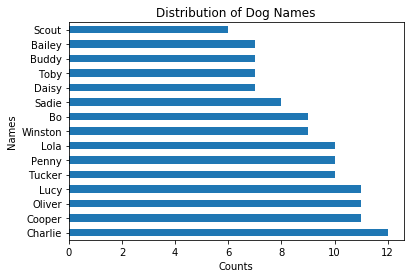

In [72]:
# rank the names frequency in a descending order
df_all.name.value_counts().sort_values(ascending =False)[:15].plot(kind = 'barh')
plt.title('Distribution of Dog Names')
plt.xlabel('Counts')
plt.ylabel('Names');
#Save
plt.savefig('Dog_names.png')

#### The figure shows that most common names are Charlie, Lucy, Oliver, and Cooper.

## Which dog stage people like to have?

In [74]:
# count dog stages
print(df_all['dog_stage'].value_counts())

pupper            243
doggo              80
puppo              28
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64


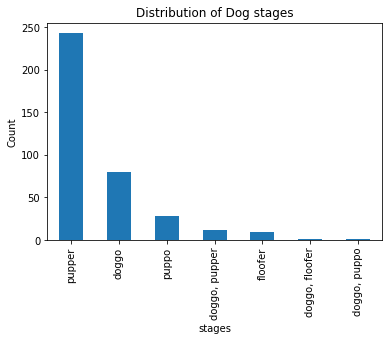

In [75]:
#plot the dog stages
df_all.dog_stage.value_counts()[:10].plot(kind = 'bar')
plt.title('Distribution of Dog stages')
plt.xlabel('stages')
plt.ylabel('Count');

#Save
plt.savefig('Dog_stages.png')

#### People like to have pupper.

## What is the dog rate distrbution?

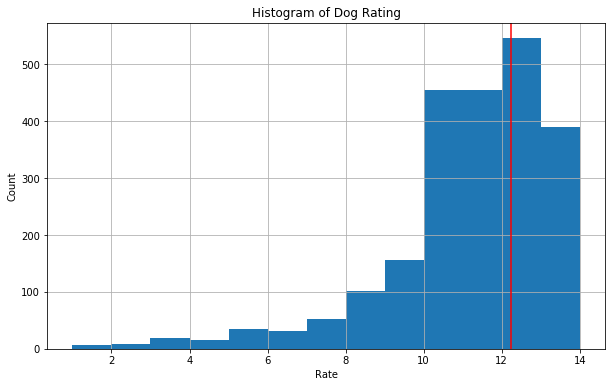

In [76]:
#plot the rating_numerator
bin_values = np.arange(start=1, stop=15, step=1)
df_all['rating_numerator'].hist(bins=bin_values, figsize=[10,6])
plt.axvline(x= df_all['rating_numerator'].mean(),color='red', linestyle='-',label ='Mean')    
# Add labels
plt.title('Histogram of Dog Rating')
plt.xlabel('Rate')
plt.ylabel('Count')
#save 
plt.savefig('Dog_rating.png')

#### The figure shows that max rating is 14 and most rating is a round 12

## Referance
* Farmer, C., Morrissey, M., &amp; Wasser, L. (2018, February 05). Automate Getting Twitter Data in Python Using Tweepy and API Access. Retrieved June 30, 2020, from https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/.

* NA, N. (na). Pandas.read_json¶. Retrieved June 30, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html.

* Santarcangelo, J. (na). Dealing with Missing Values in Python - Data Wrangling. Retrieved July 08, 2020, from https://www.coursera.org/lecture/data-analysis-with-python/dealing-with-missing-values-in-python-1IrbT.

* NA, N. (1966, February 01). Converting object to datetime format in python. Retrieved July 10, 2020, from https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python.

* NA, N. (2016, May 23). Python Histograms, Box Plots, &amp; Distributions: Python - Mode Analytics. Retrieved July 19, 2020, from https://mode.com/python-tutorial/python-histograms-boxplots-and-distributions/


* NA, N. (2016, July 28). Matplotlib Bar chart. Retrieved July 19, 2020, from https://pythonspot.com/matplotlib-bar-chart/

* NA, N. (2017, March 01). How to concatenate multiple column values into a single column in Panda dataframe. Retrieved July 15, 2020, from https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-datafram.

* NA, N. (2018, September 01). Pandas plot value counts barplot in descending manner. Retrieved July 17, 2020, from https://stackoverflow.com/questions/49059956/pandas-plot-value-counts-barplot-in-descending-manner

* NA, N. (na). Data to Fish. Retrieved July 13, 2020, from https://datatofish.com/integer-to-float-dataframe/.

* NA, N. (na). Pandas: Rename index / columns names (labels) of DataFrame. Retrieved July 13, 2020, from https://note.nkmk.me/en/python-pandas-dataframe-rename/.

* Santarcangelo, J. (na). Dealing with Missing Values in Python - Data Wrangling. Retrieved July 08, 2020, from https://www.coursera.org/lecture/data-analysis-with-python/dealing-with-missing-values-in-python-1IrbT

